In [1]:
%matplotlib inline 
#los plots se muestran en este mismo notebook

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
#import seaborn as sns #- uncomment this if you want to use seaborn for better-looking plots

Muestras de q: 10000
Muestras de p: 2390


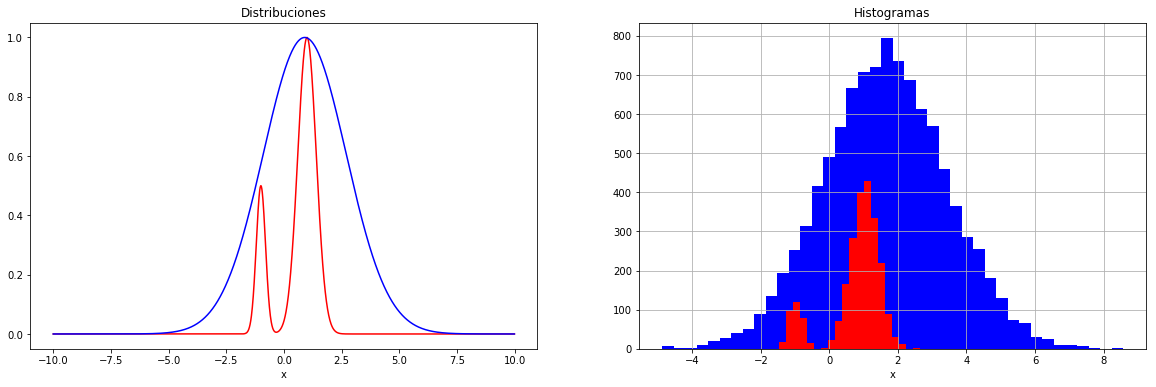

In [2]:
#rejection sampling

x = np.arange(-10,10,0.01)
#target
s1=0.4
s2=0.2
s=1.8#1.8
M=1 #1
offset=0.9 #0.8
p = np.exp(-(x-1)**2/(2.0*s1**2)) + 0.5*np.exp(-(x+1)**2/(2.0*s2**2))
q = M*np.exp(-(x-offset)**2/(2.0*s**2)) 


s_p = list()
s_q = list()

for i in range(10000):
    sample = (offset + np.random.randn())*s
    s_q.append(sample)
    if np.random.rand() < (np.exp(-(sample-1)**2/(2.0*s1**2)) + 0.5*np.exp(-(sample+1)**2/(2.0*s2**2)))/M/np.exp(-(sample-offset)**2/(2.0*s**2)): 
        s_p.append(sample)


h_p=np.histogram(s_p)
h_q=np.histogram(s_q)


plt.figure(1, figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Distribuciones')
#plt.axis([-5, 5, 0, 1.5])
plt.xlabel('x')
plt.ylabel('')
plt.plot(x, p, 'r', x, q, 'b')

plt.subplot(1,2,2)
plt.title('Histogramas')
#plt.axis([-5, 5, 0, 10])
plt.xlabel('x')
plt.ylabel('')
plt.hist(s_q,bins=40, color='b')

plt.hist(s_p,bins=20, color='r')

print(f'Muestras de q: {len(s_q)}')
print( f'Muestras de p: {len(s_p)}')


plt.grid(True)
plt.show()

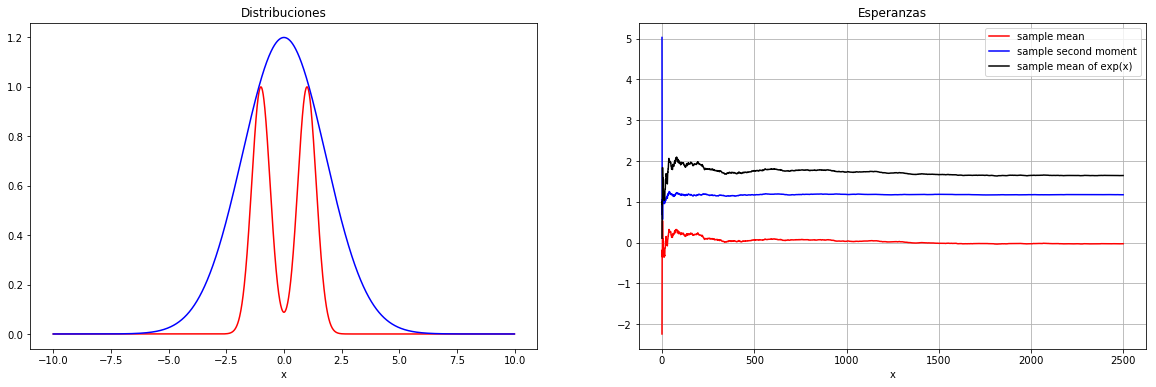

In [3]:
#importance sampling

x = np.arange(-10,10,0.01)
#target
s1=0.4
s2=0.4
s=1.8
p = np.exp(-(x-1)**2/(2.0*s1**2)) + np.exp(-(x+1)**2/(2.0*s2**2))
q = 1.2*np.exp(-(x)**2/(2.0*s**2)) 


s_q = list()
I = list()
I2 = list()
I3 = list()
w = list()
itera = 2500

for i in range(itera):
    sample = np.random.randn()*s
    s_q.append(sample)
    w.append((np.exp(-(sample-1)**2/(2.0*s1**2)) + 1*np.exp(-(sample+1)**2/(2.0*s2**2)))/1.2/np.exp(-(sample)**2/(2.0*s**2))) 
    c = (np.ones(len(s_q))*s_q*w).tolist()
    I.append(np.sum(c)/np.sum(w))
    c2 = (np.ones(len(s_q))*s_q*s_q*w).tolist()
    I2.append(np.sum(c2)/np.sum(w))
    c3 = (np.ones(len(s_q))*np.exp(s_q)*w).tolist()
    I3.append(np.sum(c3)/np.sum(w))



plt.figure(1, figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Distribuciones')
#plt.axis([-5, 5, 0, 1.5])
plt.xlabel('x')
plt.ylabel('')
plt.plot(x, p, 'r', x, q, 'b')

plt.subplot(1,2,2)
plt.title('Esperanzas')
#plt.axis([1, itera, -5, 5])
plt.plot(I,'r', label = 'sample mean')
plt.plot(I2,'b', label='sample second moment')
plt.plot(I3,'black', label = 'sample mean of exp(x)')
plt.xlabel('x')
plt.ylabel('')
plt.legend()




plt.grid(True)
plt.show()

In [4]:
(np.exp(1)+ np.exp(-1))/2

1.5430806348152437

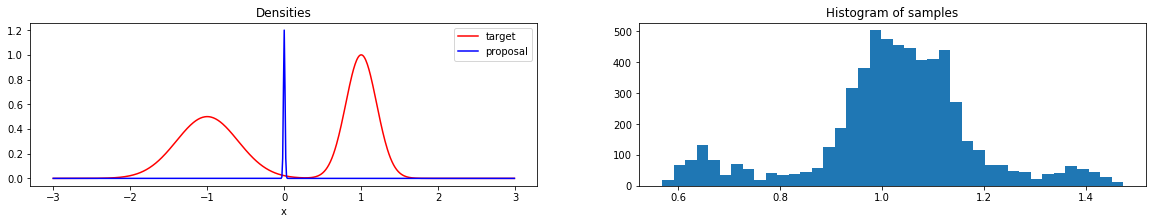

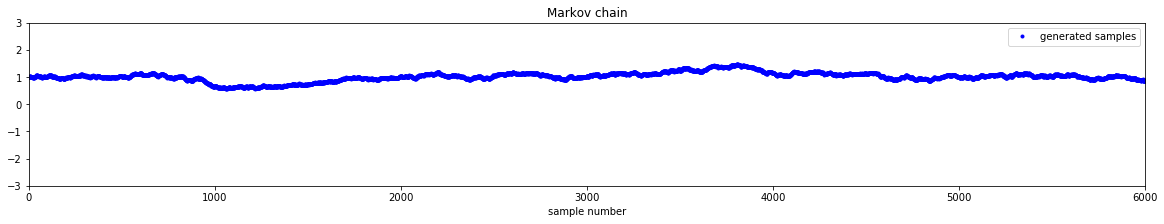

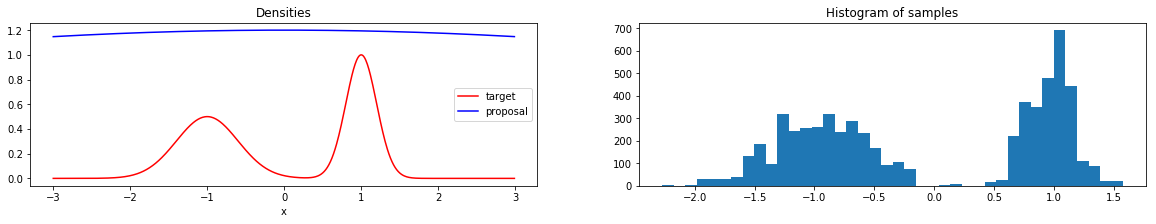

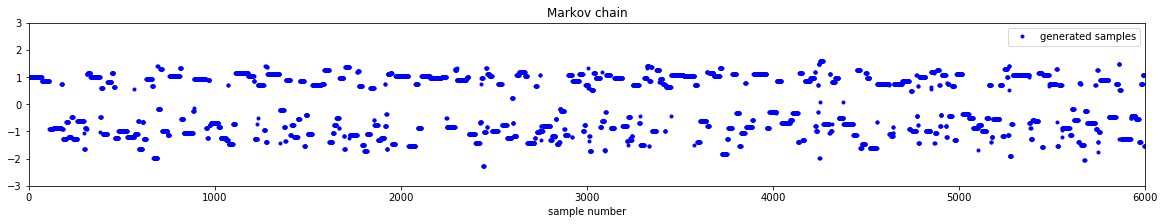

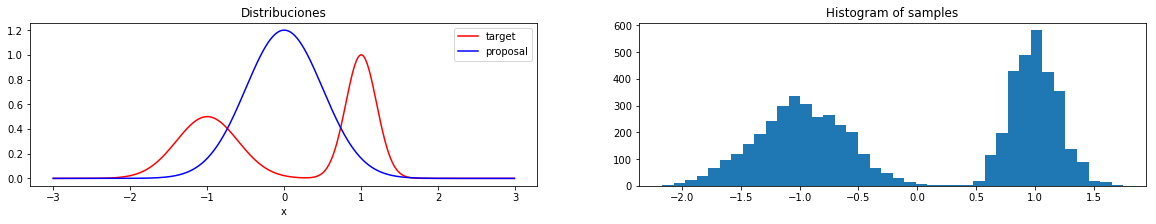

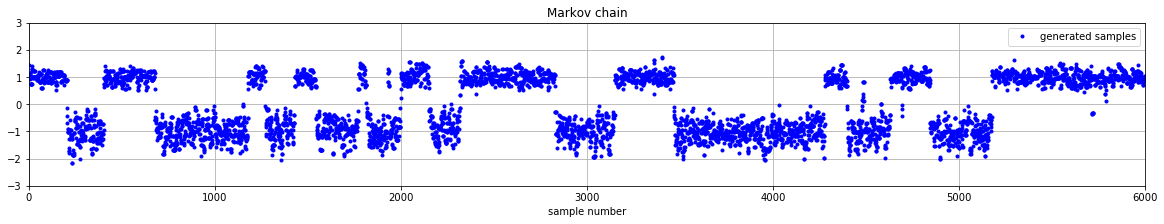

In [5]:
## metropolis hastings
import matplotlib.gridspec as gridspec

x = np.arange(-3,3,0.01)
#target
s1=0.2
s2=0.4
sa=0.01
sb=10
sc=0.5

#target distribution
p = np.exp(-(x-1)**2/(2.0*s1**2)) + 0.5*np.exp(-(x+1)**2/(2.0*s2**2))

#narrow proposal
qa = 1.2*np.exp(-(x)**2/(2.0*sa**2))

#wide proposal
qb = 1.2*np.exp(-(x)**2/(2.0*sb**2))

#medium proposal
qc = 1.2*np.exp(-(x)**2/(2.0*sc**2))


s_qa = [1]
s_qb = [1]
s_qc = [1]


itera = 6000

for i in range(itera):
    candidate_a = s_qa[-1]+np.random.randn()*sa
    if np.random.rand() < (np.exp(-(candidate_a-1)**2/(2.0*s1**2)) + 0.5*np.exp(-(candidate_a+1)**2/(2.0*s2**2)))/(np.exp(-(s_qa[-1]-1)**2/(2.0*s1**2)) + 0.5*np.exp(-(s_qa[-1]+1)**2/(2.0*s2**2))): 
        s_qa.append(candidate_a)
    else:
        s_qa.append(s_qa[-1])
        
    candidate_b = s_qb[-1]+np.random.randn()*sb
    if np.random.rand() < (np.exp(-(candidate_b-1)**2/(2.0*s1**2)) + 0.5*np.exp(-(candidate_b+1)**2/(2.0*s2**2)))/(np.exp(-(s_qb[-1]-1)**2/(2.0*s1**2)) + 0.5*np.exp(-(s_qb[-1]+1)**2/(2.0*s2**2))): 
        s_qb.append(candidate_b)
    else:
        s_qb.append(s_qb[-1])
        
    candidate_c = s_qc[-1]+np.random.randn()*sc
    if np.random.rand() < (np.exp(-(candidate_c-1)**2/(2.0*s1**2)) + 0.5*np.exp(-(candidate_c+1)**2/(2.0*s2**2)))/(np.exp(-(s_qc[-1]-1)**2/(2.0*s1**2)) + 0.5*np.exp(-(s_qc[-1]+1)**2/(2.0*s2**2))): 
        s_qc.append(candidate_c)
    else:
        s_qc.append(s_qc[-1])
    



plt.figure(1, figsize=(20,3))



plt.subplot(1,2,1)
plt.title('Densities')
#plt.axis([-5, 5, 0, 1.5])
plt.xlabel('x')
plt.ylabel('')
plt.plot(x, p, 'r', label='target',)
plt.plot(x, qa, 'b',label='proposal')
plt.legend()

plt.subplot(1,2,2)
plt.hist(s_qa,40)
plt.title('Histogram of samples')

plt.figure(2, figsize=(20,3))
plt.plot(s_qa,'b.',label='generated samples')
plt.xlabel('sample number')

plt.legend()
plt.title('Markov chain')
plt.axis([0, itera, -3, 3])

plt.figure(3, figsize=(20,3))
plt.subplot(1,2,1)
plt.title('Densities')
#plt.axis([-5, 5, 0, 1.5])
plt.xlabel('x')
plt.ylabel('')
plt.plot(x, p, 'r', label='target',)
plt.plot(x, qb, 'b',label='proposal')
plt.legend()



plt.subplot(1,2,2)
plt.hist(s_qb,40)
plt.title('Histogram of samples')


plt.figure(4, figsize=(20,3))
plt.plot(s_qb,'b.',label='generated samples')
plt.xlabel('sample number')
plt.legend()
plt.title('Markov chain')
plt.axis([0, itera, -3, 3])

plt.figure(5, figsize=(20,3))
plt.subplot(1,2,1)
plt.title('Distribuciones')
plt.xlabel('x')
plt.ylabel('')
plt.plot(x, p, 'r', label='target',)
plt.plot(x, qc, 'b',label='proposal')
plt.legend()





plt.subplot(1,2,2)
plt.hist(s_qc,40)
plt.title('Histogram of samples')

plt.figure(6, figsize=(20,3))
plt.plot(s_qc,'b.',label='generated samples')
plt.xlabel('sample number')
plt.legend()
plt.title('Markov chain')
plt.axis([0, itera, -3, 3])






plt.grid(True)
plt.show()